In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_1 = cv2.imread("example.jpg")
image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)
image_2 = cv2.imread("wallpaper.jpg")
image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)

image_1.shape

(5616, 3744, 3)

In [3]:
image_2.shape

(4000, 6000, 3)

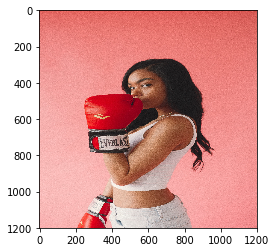

In [4]:
# Blending Images of the same size

image_1 = cv2.resize(image_1, (1200,1200))
image_2 = cv2.resize(image_2, (1200,1200))

plt.imshow(image_1)

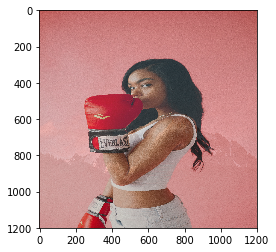

In [5]:
blended = cv2.addWeighted(src1=image_1, alpha=0.8, src2=image_2, beta=0.2, gamma=0)

plt.imshow(blended)

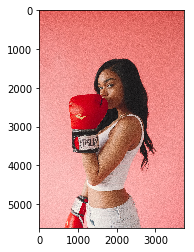

In [6]:
# Overlay small image on top of large images, (no blending)
# numpy reassignment

image_1 = cv2.imread("example.jpg")
image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)
image_2 = cv2.imread("wallpaper.jpg")
image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)

image_2 = cv2.resize(image_2, (600,600))

plt.imshow(image_1)

In [7]:
large_img = image_1
small_img = image_2

x_offset = 0
y_offset = 0

x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

small_img.shape

(600, 600, 3)

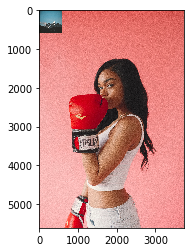

In [8]:
large_img[y_offset:y_end, x_offset:x_end] = small_img

plt.imshow(large_img)

In [9]:
# Blending Images of Different size

image_1 = cv2.imread("wallpaper.jpg")
image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)
image_2 = cv2.imread("do_not_copy.png")
image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)

image_2 = cv2.resize(image_2, (600,600))

In [22]:
image_1.shape

x_offset = image_1.shape[1] - 600
y_offset = image_1.shape[0] - 600

rows, cols, channels = image_2.shape

roi = image_1[y_offset:image_1.shape[0], x_offset:image_1.shape[1]]


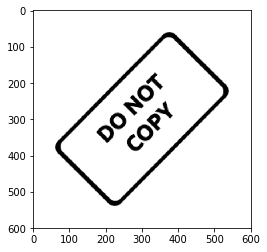

In [23]:
# Creating the mask

image_to_gray = cv2.cvtColor(image_2, cv2.COLOR_RGB2GRAY)

plt.imshow(image_to_gray, cmap='gray')

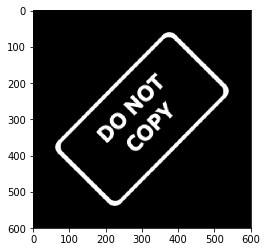

In [24]:
mask_inv = cv2.bitwise_not(image_to_gray)

plt.imshow(mask_inv, cmap='gray')


In [25]:
white_background = np.full(image_2.shape,255)


In [26]:
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)

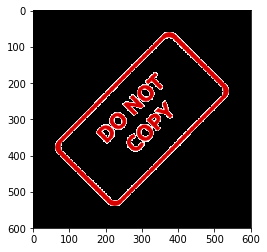

In [27]:
fg = cv2.bitwise_or(image_2, image_2, mask=mask_inv)


plt.imshow(fg)

(600, 600, 3)

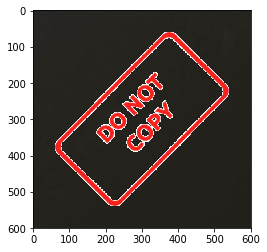

In [28]:
final_roi = cv2.bitwise_or(roi,fg)

plt.imshow(final_roi)

final_roi.shape

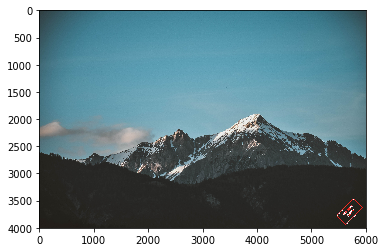

In [36]:
image_1[y_offset:,x_offset:,:] = final_roi

plt.imshow(image_1)

In [83]:
image_1 = cv2.imread("wallpaper.jpg")
image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)
image_2 = cv2.imread("don.jpg")
image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)

image_1 = cv2.resize(image_1, (600,600))
image_2 = cv2.resize(image_2, (600,600))

print(image_1[0,0,:])
print(image_2[0,0,:])

image_3 = cv2.bitwise_or(image_2, image_1)

print(image_3[0,0,:])

[48 62 63]
[229  97  93]
[245 127 127]


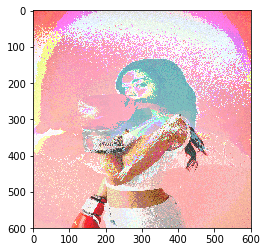

In [84]:
plt.imshow(image_3)